<a href="https://colab.research.google.com/github/babcockt18/On-Nonlinearities-in-QML-Paper-Implementation/blob/adding_ipynb_rds/QHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of *Nonlinear transformations in quantum computation*

In [35]:
# Installs
%pip install -qqq pennylane --progress-bar off

In [2]:
# Imports
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [36]:
# 4-qubit input state
states = [[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)]]

# Define the power to raise the nonlinearity
k = 2

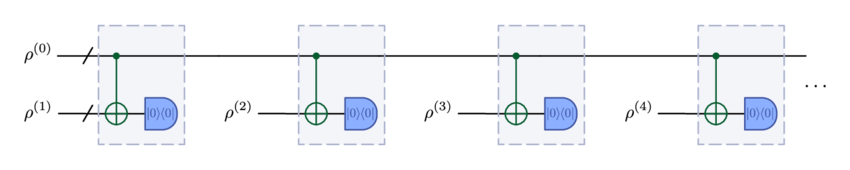

In [33]:
# instantiate qml.device
dev = qml.device('default.qubit', wires=5, shots=1000)

# Iterated Quantum Hadamard Product Circuit
@qml.qnode(dev)
def circuit(states, k):
    qml.QubitStateVector(states[0], wires=[0])
    for j in range(k):
      for i in range(1, len(states)):
          qml.QubitStateVector(states[i], wires=[i])
          qml.CNOT(wires=[0, i])
          # qml.Projector([0], wires=[i]) #I think that the projector normalizes the outputs to 00000 and 10000 but idk why the number of shots goes down..?

    return qml.counts(all_outcomes=False)

In [34]:
print('The matrix output is: {0}'.format(circuit(states, k)))

The matrix output is: {'01110': 514, '10000': 486}


In [ ]:
# Absolute Sampling Error
absolute_sampling_error = np.array([np.sqrt(circuit(states, i)[1]) for i in range(2,10)])

# Expected Values
expected_values = np.array([circuit(states, i) for i in range(2,10)])

# Relative Error
relative_error = np.array([np.sqrt(circuit(states, i)[1]) / circuit(states, i)[0] for i in range(2,10)])

In [ ]:
print(relative_error)
print(expected_values)

[[ 5.55111512e-17+0.00000000e+00j -9.17877080e+32-0.00000000e+00j]
 [ 7.45058060e-09+0.00000000e+00j  5.09524134e+16+0.00000000e+00j]
 [ 0.00000000e+00+1.41421356e+00j -1.41421356e+00-0.00000000e+00j]
 [ 0.00000000e+00+1.41421356e+00j -1.41421356e+00-0.00000000e+00j]
 [ 1.49011612e-08+0.00000000e+00j -1.45578324e+16-0.00000000e+00j]
 [ 0.00000000e+00+1.05367121e-08j -2.54762067e+16-0.00000000e+00j]
 [ 1.41421356e+00+0.00000000e+00j  1.41421356e+00+0.00000000e+00j]
 [ 1.41421356e+00+0.00000000e+00j  1.41421356e+00+0.00000000e+00j]]


In [ ]:
# List of Powers of K to plot on x-axis
powers_k = np.array([2,3,4,5,6,7,8,9])

# Powers of K vs Absolute Sampling Error
plt.plot(powers_k, absolute_sampling_error)

# Powers of K vs Relative Error
plt.plot(powers_k, relative_error)

# Powers of K vs Expectation Value
plt.plot(powers_k, expected_values)

# Appendix/Graveyard

In [ ]:
# Define the power to raise the nonlinearity
k = 2

# instantiate Iterated Quantum Hadamard Product Circuit
dev = qml.device('default.qubit', wires=5, shots=1000)


def qhp_operator(k):
    for j in range(k):
      for i in range(1, len(states)):
          qml.CNOT(wires=[0, i])
          qml.measure(i)
    return qml.expval(qml.PauliZ(wires=5))

@qml.qnode(dev)
# @qml.defer_measurements
def circuit_1(states, k):
  return qml.expval(qml.QubitStateVector(states[0], wires=[0]) @ qhp_operator(k))

In [ ]:
# TODO: turn the above function into an operator function
# TODO: create a |0X0| operator function
# TODO: create a circuit that returns over finite shots a sample of qml.expval(O(state) @ M(i))

In [ ]:
states = [[1 / np.sqrt(2), 1 / np.sqrt(2)],[1 / np.sqrt(2), 1 / np.sqrt(2)]]
# states = [[1, 0],[0, 1]]
print('The number of states is: {0}'.format(len(states)))
# instantiate Quantum Hadamard Product Circuit
dev = qml.device('default.qubit', wires=len(states), shots=1000)


@qml.qnode(dev)
def qhp(states, control, target):

  # qml.Hadamard(wires=[0])

  for i in range(1, len(states)):
    # qml.Hadamard(wires=[i])
    qml.CNOT(wires=[0, i])
    # qml.measure(i, reset=True)
    qml.Projector([0], wires=[i])

  # return qml.density_matrix(wires=[0])
  return qml.counts(all_outcomes=False)

The number of states is: 2


In [ ]:
print('The matrix output is: {0}'.format(qhp(states, 0,1)))

The matrix output is: {'00': 1000}
